In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
df = pd.read_csv(r"C:\Users\USER\Desktop\PROJECT\Hierarchical\customer.csv")
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [6]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.shape

(73724, 371)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

In [8]:
np.random.seed(42)

sample_size = 3000   # safe for hierarchical clustering
sample_idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)

X_sample = X_scaled[sample_idx]
df_sample = df.iloc[sample_idx].copy()

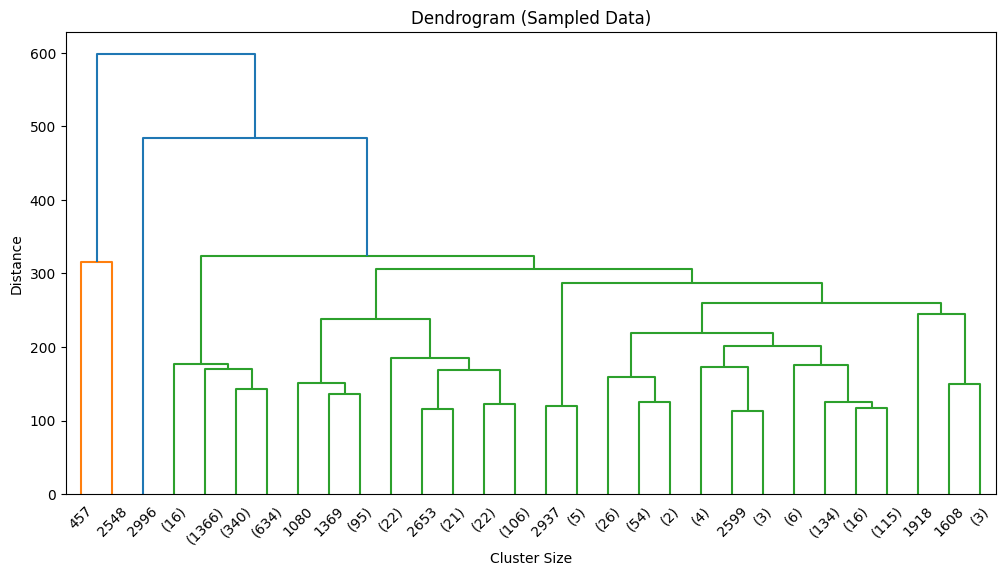

In [9]:
plt.figure(figsize=(12, 6))

linked = linkage(X_sample, method='ward')

dendrogram(
    linked,
    truncate_mode='lastp',
    p=30
)

plt.title("Dendrogram (Sampled Data)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [10]:
hc = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='ward'
)

clusters = hc.fit_predict(X_sample)

In [11]:
df_sample['Cluster'] = clusters
df_sample.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,Cluster
34776,69496,2,71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60883.560,0,1
24584,49195,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53334.840,0,3
40629,81275,2,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64329.210,0,3
10560,21183,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0,3
5784,11598,2,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0,3


In [12]:
df_sample.groupby('Cluster').mean()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
Cluster,,,,,,,,,,,,,,,,,,,,,
0,95728.500000,2.000000,55.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,96085.935000,0.000000
1,73518.152886,5.333853,43.466459,242.017535,299.349548,544.904087,18.638565,36.43727,0.0,0.0,...,44.667192,9.85493,46.220312,34.552652,74.128549,9.297426,125.00766,91.53103,123845.477585,0.028081
2,57835.000000,2.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,307456.890000,0.000000
3,74633.713497,-2544.496604,30.552632,49.202419,8.104431,13.544172,0.000000,0.00000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,116249.025388,0.046265


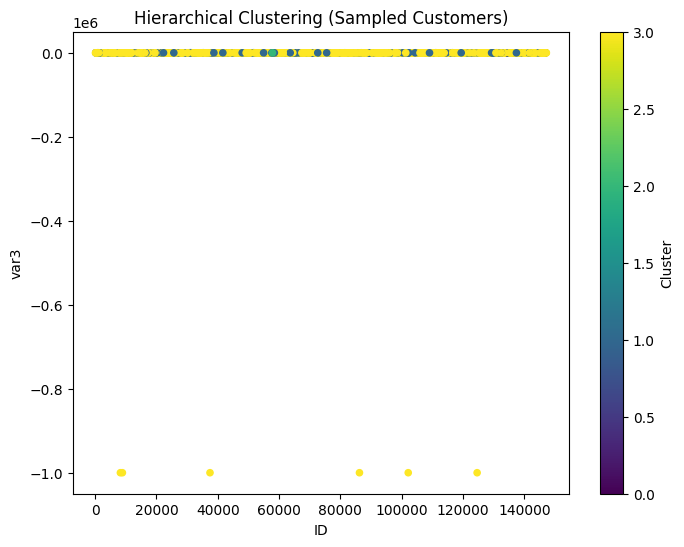

In [13]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df_sample.iloc[:, 0],
    df_sample.iloc[:, 1],
    c=df_sample['Cluster'],
    cmap='viridis',
    s=20
)

plt.xlabel(df_sample.columns[0])
plt.ylabel(df_sample.columns[1])
plt.title("Hierarchical Clustering (Sampled Customers)")
plt.colorbar(label='Cluster')
plt.show()